# Drawings Assignment - Pandas

#### Importing necessary libraries

In [1220]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.animation as animation
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib notebook 

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#### Importing the data

In [1221]:
data=[]
for i in range(1,22):
    data.append(pd.read_csv(r'C:\Users\Morian Hamami\Downloads\train\train\7560\SimpleTest\\' + str(i) + '.csv'))
    
for j in range(0,3):
    print("Drawing number", j+1, "data")
    print(data[j].head(3))

Drawing number 1 data
          X           Y   Pressure    TiltX   TiltY           Time
0  385.1775  543.653333   0.352051  10280.0  8772.0  00:14.4429720
1  384.3225  543.780000   0.357910  10280.0  8772.0  00:14.4562455
2   383.325  544.160000   0.274170  10280.0  8772.0  00:14.4582401
Drawing number 2 data
          X           Y   Pressure   TiltX   TiltY           Time
0  576.1275  677.160000   0.244873  9422.0  7320.0  00:09.8294749
1  575.2725  678.933333   0.248779  9422.0  7320.0  00:09.8428617
2   571.995  682.733333   0.269287  9422.0  7320.0  00:09.8428617
Drawing number 3 data
          X           Y   Pressure   TiltX   TiltY           Time
0  666.4725  643.973333   0.487061  9707.0  6111.0  00:02.2100476
1    665.19  646.380000   0.517090  9707.0  6111.0  00:02.2233834
2    663.48  648.026667   0.521484  9707.0  6111.0  00:02.2380252


In [1222]:
data[0].columns

Index(['X', ' Y', ' Pressure', ' TiltX', ' TiltY', ' Time'], dtype='object')

We can notice that there are many spaces in the column names, therefore we will rename the columns.

In [1223]:
for j in range(0,21):
    data[j].rename(columns = {'X':'X', ' Y':'Y' ,' Pressure':'Pressure' , ' TiltX':'TiltX' , ' TiltY':'TiltY' , ' Time': 'Time'}, inplace = True)

data[0].columns

Index(['X', 'Y', 'Pressure', 'TiltX', 'TiltY', 'Time'], dtype='object')

#### Missing values

Now, we will check null values:

In [1224]:
for j in range(0,3):
    print(data[j].isnull().sum())

X           0
Y           2
Pressure    2
TiltX       2
TiltY       2
Time        2
dtype: int64
X           0
Y           2
Pressure    2
TiltX       2
TiltY       2
Time        2
dtype: int64
X           0
Y           2
Pressure    2
TiltX       2
TiltY       2
Time        2
dtype: int64


We can see that each drawing has 2 rows of null values. We will check in the first picture why are there null values.

In [1225]:
temp=data[0]
temp[temp.isna().any(axis=1)]

,X,Y,Pressure,TiltX,TiltY,Time
141,Time Elapsed till drawing started: 00:14.4221442,NaN,NaN,NaN,NaN,NaN
142,Time Elapsed till drawing submit: 00:18.6462128,NaN,NaN,NaN,NaN,NaN


We can see that at the end of each dataframe, were sentences irrelevant to the dataframe. Therefore, we will remove these rows.

In [1226]:
for j in range(0,21):
    data[j].dropna(inplace = True)

data[0].isnull().sum()

X           0
Y           0
Pressure    0
TiltX       0
TiltY       0
Time        0
dtype: int64

#### Data type

In [1227]:
data[0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 0 to 140
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X         141 non-null    object 
 1   Y         141 non-null    float64
 2   Pressure  141 non-null    float64
 3   TiltX     141 non-null    float64
 4   TiltY     141 non-null    float64
 5   Time      141 non-null    object 
dtypes: float64(4), object(2)
memory usage: 7.7+ KB


We can see that column X and Time are objects. In order to work with the data properly we will have to change their type.

In [1228]:
for j in range(0,21):
    data[j]['X']=data[j]['X'].astype(float)

#Removing unnecessary Date information. Leaving only the miliseconds.
for j in range(0,21):
    data[j]['Time']=data[j]['Time'].str.slice(3).astype(float)

data[0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 0 to 140
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X         141 non-null    float64
 1   Y         141 non-null    float64
 2   Pressure  141 non-null    float64
 3   TiltX     141 non-null    float64
 4   TiltY     141 non-null    float64
 5   Time      141 non-null    float64
dtypes: float64(6)
memory usage: 7.7 KB


#### Preparing the data

In [1229]:
#Adding a time difference column 
for i in range(0,21):
    data[i]['Time_Diff'] = data[i]['Time'].diff()

#Adding a column with the difference in each axis 
for i in range(0,21):
    data[i]['X_Diff'] = data[i]['X'].diff()
    data[i]['Y_Diff'] = data[i]['Y'].diff()
    
#Adding a distance column
for i in range(0,21):
    data[i]['Distance']=(data[i]['X'].diff()**2 + data[i]['Y'].diff()**2).apply(lambda x: math.sqrt(x))

#Adding a column with the differnce between tilts in each axis
for i in range(0,21):
    data[i]['TiltX_Diff'] = data[i]['TiltX'].diff()
    data[i]['TiltY_Diff'] = data[i]['TiltY'].diff()
    
#Adding a column with the differnce between pressure between every 2 rows
for i in range(0,21):
    data[i]['Press_Diff'] = data[i]['Pressure'].diff()

data[0].head()

,X,Y,Pressure,TiltX,TiltY,Time,Time_Diff,X_Diff,Y_Diff,Distance,TiltX_Diff,TiltY_Diff,Press_Diff
0,385.1775,543.653333,0.352051,10280.0,8772.0,14.442972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,384.3225,543.780000,0.357910,10280.0,8772.0,14.456245,0.013274,-0.8550,0.126667,0.864332,0.0,0.0,0.005859
2,383.3250,544.160000,0.274170,10280.0,8772.0,14.458240,0.001995,-0.9975,0.380000,1.067430,0.0,0.0,-0.083740
3,383.3250,544.160000,0.260010,10280.0,8772.0,14.465273,0.007033,0.0000,0.000000,0.000000,0.0,0.0,-0.014160
4,383.0400,544.286667,0.237793,10280.0,8772.0,14.465273,0.000000,-0.2850,0.126667,0.311880,0.0,0.0,-0.022217


We will remove the first row in each dataframe because tehy don't include the differences from the row before. 

In [1230]:
for j in range(0,21):
    data[j].dropna(inplace = True)
    
data[0].isnull().sum()

X             0
Y             0
Pressure      0
TiltX         0
TiltY         0
Time          0
Time_Diff     0
X_Diff        0
Y_Diff        0
Distance      0
TiltX_Diff    0
TiltY_Diff    0
Press_Diff    0
dtype: int64

### Algorithm 1 - Counting the amout of different lines in the drawing

From past knowledge, we can understand that there can be two ways to realize if a drawing of a line ended:
    
    1. The placement of the pen is far away from one timestamp to the following timestamp.
    Meaning that the distance of two points is large in comparison to the average distance of the nearby points.
    
    2. Between every two points we have a slope. If the difference between one slope and the next is greater than the 
    average slope of the nearby points, there is a new line.
    
We will reduce the amount of indexes in accordance with these unique points, until eventually the reduced index list will represent the amount of lines. 

In [1231]:
#Adding a slope column and angel difference column
for i in range (0,21):
    data[i]['Slope']=(data[i]['Y_Diff']/data[i]['X_Diff'])*100

#For every 90 degree angel, the Y axis was divided by zero and got a null value. 
#Therefore, we will change it manually to 90 degrees.
for j in range(0,21):
    data[j].fillna(90, inplace = True)
    
#Adding a slope difference column
for i in range (0,21):
    data[i]['Slope_Diff']=data[i]['Slope'].diff()
    
#Adding a slope average column
for i in range (0,21):
    data[i]['Index'] = data[i].index
    data[i]['Average_Slope'] = data[i]['Index'].apply(lambda x: data[i]['Slope'][(data[i].index > x) & (data[i].index <= x+5)].mean())
    data[i] = data[i].reset_index()
    
#Removing null row:
for j in range(0,21):
    data[j].dropna(inplace = True)
    data[j] = data[j].reset_index()

#Resetting index column
for i in range (0,21):
    data[i]['Index'] = data[i].index
    
data[0].head()

,level_0,index,X,Y,Pressure,TiltX,TiltY,Time,Time_Diff,X_Diff,Y_Diff,Distance,TiltX_Diff,TiltY_Diff,Press_Diff,Slope,Slope_Diff,Index,Average_Slope
0,1,2,383.325,544.160000,0.274170,10280.0,8772.0,14.458240,0.001995,-0.9975,0.380000,1.06743,0.0,0.0,-0.083740,-38.095238,-23.280423,0,54.000000
1,2,3,383.325,544.160000,0.260010,10280.0,8772.0,14.465273,0.007033,0.0000,0.000000,0.00000,0.0,0.0,-0.014160,90.000000,128.095238,1,38.962963
2,3,4,383.040,544.286667,0.237793,10280.0,8772.0,14.465273,0.000000,-0.2850,0.126667,0.31188,0.0,0.0,-0.022217,-44.444444,-134.444444,2,53.185185
3,4,5,383.040,544.286667,0.247559,10280.0,8772.0,14.481853,0.016581,0.0000,0.000000,0.00000,0.0,0.0,0.009766,90.000000,134.444444,3,35.185185
4,5,6,383.040,544.286667,0.259277,10280.0,8772.0,14.495574,0.013721,0.0000,0.000000,0.00000,0.0,0.0,0.011719,90.000000,0.000000,4,21.135802


First, we will notice that picture four includes 3 lines which represent a triangle. Therefore, we will try to understand if our hypothesis might be correct.

<IPython.core.display.Javascript object>


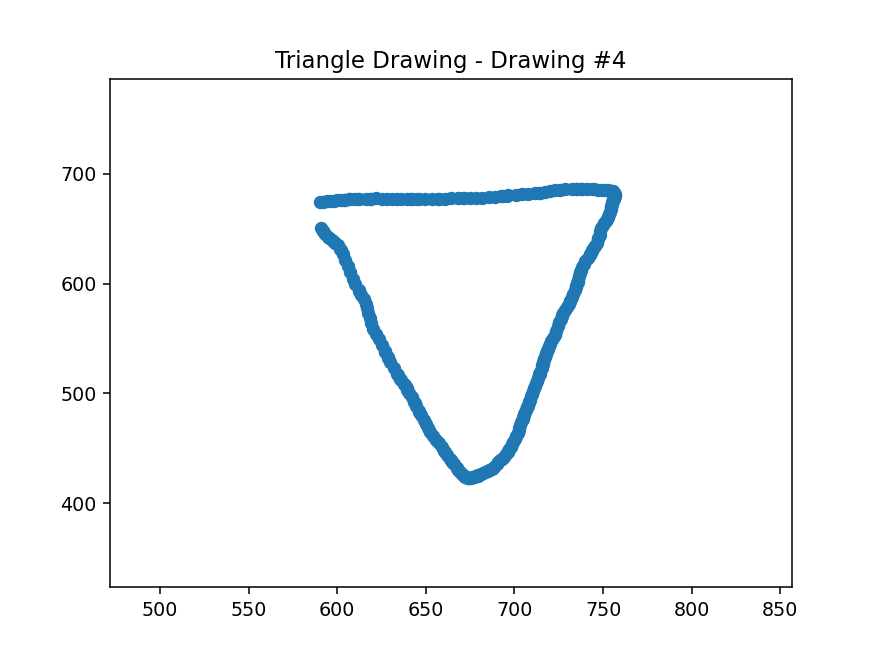

In [1153]:
fig = plt.figure()
plt.xlim(data[3]['X'].min()-100 , data[3]['X'].max() + 100)
plt.ylim(data[3]['Y'].min()-100 , data[3]['Y'].max() + 100)
graph, = plt.plot([], [], 'o')

def animate(i):
    graph.set_data(data[3]['X'][:i], data[3]['Y'][:i])
    return graph,

# setting a title for the plot 
plt.title('Triangle Drawing - Drawing #4') 

Implement_Animation = animation.FuncAnimation(fig, animate, frames=len(data[3]), interval=10)

<IPython.core.display.Javascript object>


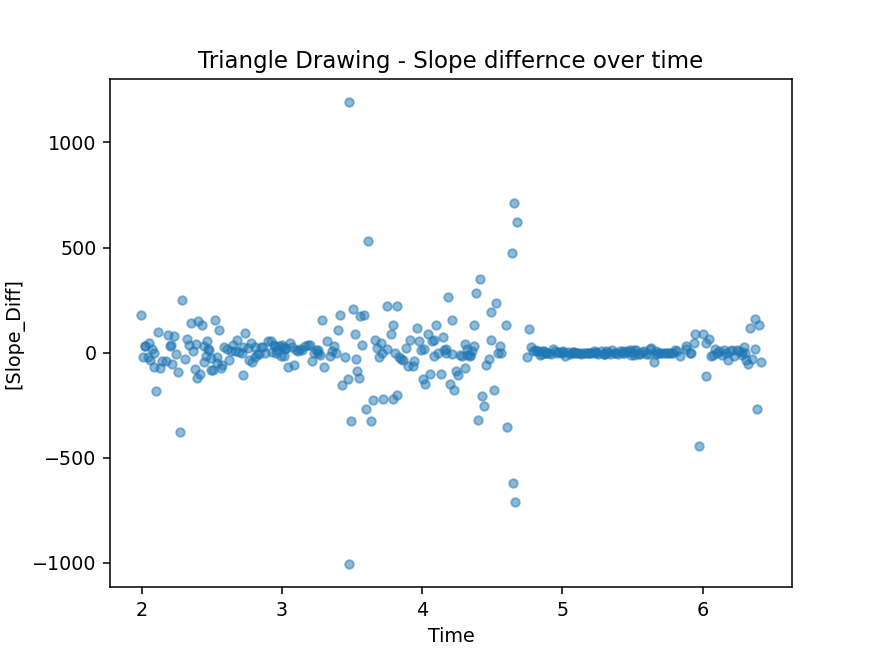

Text(0.5, 1.0, 'Triangle Drawing - Slope differnce over time')

In [1126]:
data[3].plot.scatter(y=['Slope_Diff'],x='Time', alpha=0.5)
plt.title('Triangle Drawing - Slope differnce over time')

Seems like there are some unique points in this data which will help us understand how many lines the shape has. Now we will write our algorithm!

#### Defining functions to help with our algorithm:

In [1154]:
#Function that leaves in the list only 1 in 10 points.
def remove_similarPoints(points):              
    nunique_point = []
    for i in range(len(nunique_point)-1):
        if (points[i+1]<points[i]+9):
            nunique_point.append(points[i+1])
    unique_points=[]
    for point in points:
        if (point not in nunique_point):
            unique_points.append(point)
    return unique_points

#Function that measures the length of a line (If hand was raised to another point, this distance will be included as a line)
def Line_Length(df, start_index, end_index):
    return abs(df[(df.index > start_index) & (df.index <= end_index)]['Distance'].sum())

#### Defining the actual algorithm:

In [1155]:
def LineCount(df, getPoints):
    
    unique_point = []
    unique_point2 = []

    ### Finding points where the difference nearby slopes 
    # is greater than the average slope of the nearby points:
    
    for points in df['Slope'].index:
        #Searching for big slope differnce gaps
        if ((df['Slope_Diff'][points] > 250) or (df['Slope_Diff'][points] < -250)):
            #Searching for points with big slope differences from the average slope of nearby points
            if (abs(df['Slope'][points] - df['Average_Slope'][points]) > 250):
                #Add index to unique points list
                unique_point.append(df['Index'][points])
    
      
    ### Finding points where the distance of nearby points 
    # is large in comparison to the avergae distance between nearby points:
    
    unique_dist = abs(df['Distance']) > abs((df['Distance'].median()) + (df['Distance'].std())/2)
                                    
    #if (df['Distance'].std() > 2*df['Distance'].median()):
    unique_point2 = df[unique_dist].index.values.tolist()
                                  
    unique_point = remove_similarPoints(sorted(unique_point + unique_point2))
    
    ### Removing dots from list of lines (unique points):
                                
    while(True):
        
        found=0
        nunique_point = []
                              
        #If there aren't any unique points break
        if (len(unique_point)==0):
            break
                             
        # If the length of the line until first unique point is smaller than 21, this isn't a line, just a dot.
        if (Line_Length(df, 0, unique_point[0]) <= 150):
            nunique_point.append(unique_point[0])
            found += 1
                                    
        # If the length of the line from the last unique point to the last pen apearance is smaller than 21, 
        # this isn't a line, just a dot.                            
        if Line_Length(df, unique_point[len(unique_point)-1], len(df)-1) <= 250:
            nunique_point.append(unique_point[len(unique_point)-1])
            found += 1   
            
        # If the length of the line between every two unique points is smaller than 21, this isn't a line, just a dot.                    
        for i in range(1, len(unique_point)):
            p = Line_Length(df, unique_point[i-1], unique_point[i])
            if (p <= 150):
                nunique_point.append(unique_point[i])
                found += 1 
        
        # Removing not unique points from unique points list
        for point in unique_point:
            if (point in nunique_point):
                unique_point.remove(point)
              
        # This was the last iteration if not unique points were not found
        if(found==0):
            break
    
    
    ### Counting the amount of lines according to the amount of unique points 
    # and adding 1 because one unique point is never included from the end of the data where the hand is raised 
    Lines_amount = len(unique_point) + 1
    
    #Print indexes of points where new line starts (unique points)
    if getPoints==True:
        return unique_point
    
    print("The amount of lines in the shape is: ", Lines_amount)

#### Testing the algorithm on 7 drawings

In [1159]:
LineCount(data[3], False)
print( "The number of lines in drawing of a triangle is 3")
print("SUCCESS!!!\n")

LineCount(data[0], False)
print( "The number of lines in drawing of a line is 1")
print("SUCCESS!!!\n")

LineCount(data[1], False)
print( "The number of lines in a drawing of a curved line is 1")
print("SUCCESS!!!\n")

LineCount(data[2], False)
print( "The number of lines in a drawing of a circle is 1")
print("Missed by TWO!\n")

LineCount(data[11], False)
print( "The number of lines in a drawing of a 2x2 grid is 4")
print("SUCCESS!!!\n")

LineCount(data[15], False)
print( "The number of lines in a drawing of a triangle, circle and square is 8")
print("Missed by ONE!\n")

LineCount(data[7], False)
print( "The number of lines in a drawing of a triangle inside a square is 7")
print("SUCCESS!!!\n")

The amount of lines in the shape is:  3
The number of lines in drawing of a triangle is 3
SUCCESS!!!

The amount of lines in the shape is:  1
The number of lines in drawing of a line is 1
SUCCESS!!!

The amount of lines in the shape is:  1
The number of lines in a drawing of a curved line is 1
SUCCESS!!!

The amount of lines in the shape is:  3
The number of lines in a drawing of a circle is 1
Missed by TWO!

The amount of lines in the shape is:  4
The number of lines in a drawing of a 2x2 grid is 4
SUCCESS!!!

The amount of lines in the shape is:  7
The number of lines in a drawing of a triangle, circle and square is 8
Missed by ONE!

The amount of lines in the shape is:  7
The number of lines in a drawing of a triangle inside a square is 7
SUCCESS!!!



It seems like we got a 71.4% success rate from this small sample of data. As a result of the drawings not being accurate, the percision we got is quite high.

### Algorithm 2 - Calculating the length of each line and the average pressure that is put on each line

#### Algorithm for length of each line

In [1160]:
#Get indexes of points where new line starts (unique points)
def IndexOF_LinesEnd(df):
    return LineCount(df, True)

#Function that measures the length of a line (If hand was raised to another point, this distance will be included as a line)
def Line_Length(df, start_index, end_index):
    return abs(df[(df.index > start_index) & (df.index <= end_index)]['Distance'].sum())

#Get list of the lengths of each line 
def Length_List(df):
    
    lengths=[]
    
    #If the drawing has only one line
    if len(IndexOF_LinesEnd(df))==0:
        lengths.append(Line_Length(df,0,len(df)-1))
    
    #If the drawing has a couple of lines
    for i in IndexOF_LinesEnd(df):
        dist=0
        #First point that represents end of first line
        if i==IndexOF_LinesEnd(df)[0]:
            dist=Line_Length(df, 0, i)
        #Last point that represents end of last line
        elif i==IndexOF_LinesEnd(df)[len(IndexOF_LinesEnd(df))-1]:
            dist=Line_Length(df, i, len(df)-1)
            lengths.append(dist)
            dist=Line_Length(df, i-1, i)
        #The rest of the points that represent the end of each line
        else: Line_Length(df, i-1, i) 
        lengths.append(dist)
    return lengths

#### Testing the algorithm on 3 drawings

In [1162]:
print("Straight line length:", Length_List(data[0]))
print("Triangle lines length:", Length_List(data[3]))
print("Curved line length:", Length_List(data[1]))

Straight line length: [290.92691291897717]
Triangle lines length: [163.2437481923795, 327.61812001922624, 2.8408812453180303]
Curved line length: [198.03579470407638]


#### Algorithm for average pressure put on each line

In [1209]:
def Pressure(df, start_index, end_index):
    return abs(df[(df.index > start_index) & (df.index <= end_index)]['Pressure'].median())

#Get list of the average pressure of each line 
def Avg_Press(df):
    
    Pressures=[]
    
    #If the drawing has only one line
    if len(IndexOF_LinesEnd(df))==0:
        Pressures.append(Pressure(df,0,len(df)-1))
    
    #If the drawing has a couple of lines
    else:
        for i in IndexOF_LinesEnd(df):
            med_press=0
            #First point that represents end of first line
            if i==IndexOF_LinesEnd(df)[0]:
                med_press=Pressure(df, 0, i)
            #Last point that represents end of last line
            elif i==IndexOF_LinesEnd(df)[len(IndexOF_LinesEnd(df))-1]:
                med_press=Pressure(df, i, len(df)-1)
                Pressures.append(med_press)
                med_press=Pressure(df, i-1, i)
            #The rest of the points that represent the end of each line
            else: Pressure(df, i-1, i) 
            Pressures.append(med_press)
    return Pressures

#### Testing the algorithm on 3 drawings

In [1210]:
print("Straight line average pressure:", Avg_Press(data[0]))
print("Triangle average pressure on each line:", Avg_Press(data[3]))
print("Curved line average pressure:", Avg_Press(data[1]))

Straight line average pressure: [0.61083984375]
Triangle average pressure on each line: [0.8890380859375, 0.98779296875, 1.0]
Curved line average pressure: [0.685546875]


### Algorithm 3 - Counting how many hand lifts each drawing had

In order to understand how many hand lifts each drawing had, we will inspect drawing #7 which includes 10 dots.

<IPython.core.display.Javascript object>


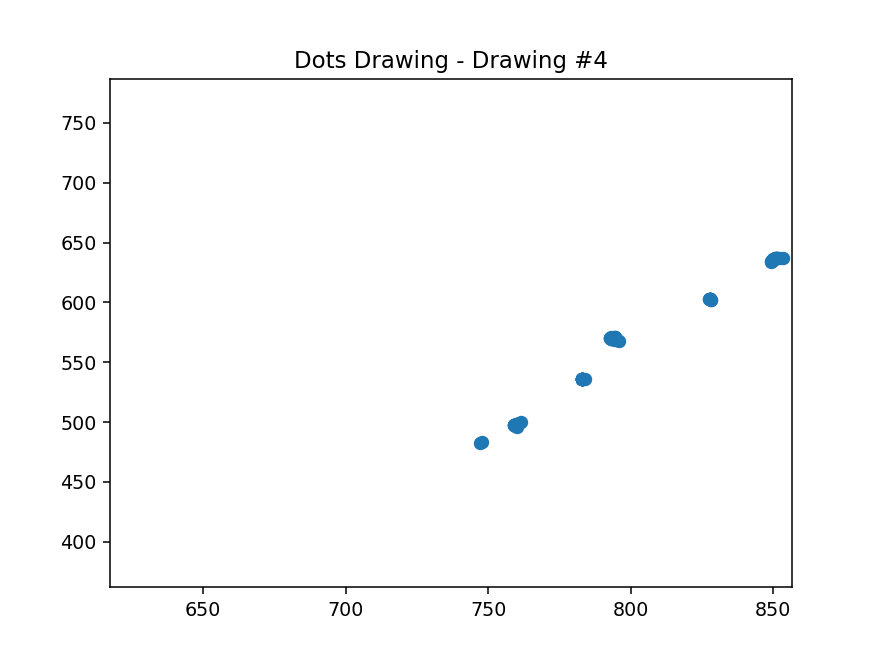

In [1165]:
fig = plt.figure()
plt.xlim(data[6]['X'].min()-100 , data[3]['X'].max() + 100)
plt.ylim(data[6]['Y'].min()-100 , data[3]['Y'].max() + 100)
graph, = plt.plot([], [], 'o')

def animate(i):
    graph.set_data(data[6]['X'][:i], data[6]['Y'][:i])
    return graph,

# setting a title for the plot 
plt.title('Dots Drawing - Drawing #4') 

Implement_Animation = animation.FuncAnimation(fig, animate, frames=len(data[6]), interval=10)

<IPython.core.display.Javascript object>


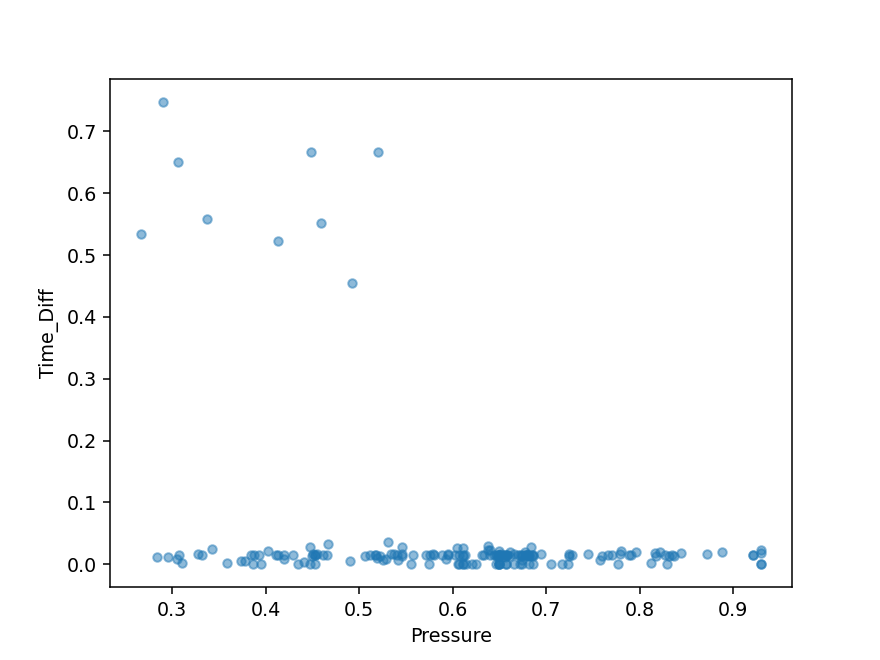

<AxesSubplot:xlabel='Pressure', ylabel='Time_Diff'>

In [1135]:
data[6].plot.scatter(x='Pressure',y='Time_Diff', alpha=0.5)

Using this plot we can see that while lifting the hand from from the drawing, the time difference is greater than 0.3.

#### Accordingly, we will define our algorithm:

In [1166]:
def hand_lifts(df):
    Lifts_count=1 #Starts with one because first apperance already includes the writing tool in use
    for i in range(1,len(df["Index"]-1)):
        if(df["Time_Diff"][i] > 0.3):
            Lifts_count=Lifts_count+1
    return Lifts_count

#### Testing the algorithm on 5 drawings:

In [1167]:
print("The number of hand lifts in a drawing of a line according to algorithm is", hand_lifts(data[0]))
print("Actual amount of hand lifts is 1\n")
if hand_lifts(data[0])==1: 
    print("success!!!\n")

print("The number of hand lifts in a drawing of a curved line according to algorithm is", hand_lifts(data[1]))
print("Actual amount of hand lifts is 1\n")
if hand_lifts(data[1])==1: 
    print("success!!!\n")
    
print("The number of hand lifts in a drawing of a circle according to algorithm is", hand_lifts(data[2]))
print("Actual amount of hand lifts is 1\n")
if hand_lifts(data[2])==1: 
    print("success!!!\n")
    
print("The number of hand lifts in a drawing of a triangle according to algorithm is", hand_lifts(data[3]))
print("Actual amount of hand lifts is 1\n")
if hand_lifts(data[3])==1: 
    print("success!!!\n")
    
print("The number of hand lifts in a drawing of 10 dots according to algorithm is", hand_lifts(data[6]))
print("Actual amount of hand lifts is 10\n")
if hand_lifts(data[6])==10: 
    print("success!!!\n")

The number of hand lifts in a drawing of a line according to algorithm is 1
Actual amount of hand lifts is 1

success!!!

The number of hand lifts in a drawing of a curved line according to algorithm is 1
Actual amount of hand lifts is 1

success!!!

The number of hand lifts in a drawing of a circle according to algorithm is 1
Actual amount of hand lifts is 1

success!!!

The number of hand lifts in a drawing of a triangle according to algorithm is 1
Actual amount of hand lifts is 1

success!!!

The number of hand lifts in a drawing of 10 dots according to algorithm is 10
Actual amount of hand lifts is 10

success!!!



### Algorithm 4 - Checking if a shape is open or closed

There are two possible outcomes where a shape is closed:
   
    1- Either a shape was drawn from one point to the same point without any hand lifts
    2- Or a couple of lines met and closed up a shape 

In [1202]:
def ClosedOrOpen(df):
    
    count=0
    
    if(hand_lifts(df)==1):
        
        #Comparing every two cordinates
        for i in range(1,len(df["Index"])):
            for j in range(1,len(df["Index"])):
                
                #If we reach the same spot we started with, shape is closed
                if (abs(df["X"][i]-df["X"][j])==0) & (abs(df["Y"][i]-df["Y"][j])==0) & (i!=j):
                    return print("Shape is closed")
                    
    for h in range(1,hand_lifts(df)): 
        
        #While hand hasn't been lifted:
        count=count+1
        while (count<len(df["Time_Diff"])-1) & (df["Time_Diff"][count]==0):
            
            #Comparing every two cordinates
            for i in range(count,len(df["Index"])):
                for j in range(count,len(df["Index"])):
                    count=count+1
                    
                    #If we reach the same spot we started with, shape is closed
                    if (abs(df["X"][i]-df["X"][j])<=0.1) & (abs(df["Y"][i]-df["Y"][j])<=0.1) & (i!=j):
                        return print("Shape is closed")


    #### Outcome #2- a couple of lines met and closed up a shape
    
def Lines_met_in_closed_shape(Lines):
    for line in Lines(df):
        if Lines_met(line, Lines)
    return True

def Lines_met(df):
    for i in 
        for j in 
          if (LineX(i)==LineX(j)) & (LineX(i)==LineX(j)) & (i!=j)
            
def LineX(df):
    IndexOF_LinesEnd(df)
    return (x_start, y_start, x_end, y_end)

def get_LinesY(index):
    linesY_list=[]
    for i in range( , index):
        linesY_list.append(df['Y'][i])
    return linesY_list
                            
def Lines(df):
    
    LinesList=[]
    
    #If the drawing has only one line
    if len(IndexOF_LinesEnd(df))==0:
        LinesList.append(Line_Length(df,0,len(df)-1))
    
    #If the drawing has a couple of lines
    else:
        for i in IndexOF_LinesEnd(df):
            dist=0
            #First point that represents end of first line
            if i==IndexOF_LinesEnd(df)[0]:
                dist=Line_Length(df, 0, i)
            #Last point that represents end of last line
            elif i==IndexOF_LinesEnd(df)[len(IndexOF_LinesEnd(df))-1]:
                dist=Line_Length(df, i, len(df)-1)
                LinesList.append(dist)
                dist=Line_Length(df, i-1, i)
            #The rest of the points that represent the end of each line
            else: Line_Length(df, i-1, i) 
            lengths.append(dist)
    
    return print("Shape is open")

In [1215]:
ClosedOrOpen(data[1])
print("In reality, the curved line is open\n")
    
ClosedOrOpen(data[3])
print("In reality, the triangle is closed\n")

ClosedOrOpen(data[17])
print("In reality, dots are open\n")

ClosedOrOpen(data[5])
print("In reality, the square is closed\n")

ClosedOrOpen(data[2])
print("In reality, the circle is closed\n")


Shape is open
In reality, the curved line is open

Shape is closed
In reality, the triangle is closed

Shape is open
In reality, dots are open

Shape is closed
In reality, the square is closed

Shape is open
In reality, the circle is closed



It seems like we got a 80% success rate from this small sample of data. As a result of the drawings not being accurate, the percision we got is quite high.